In [473]:
# Regular packages

import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, Column
# from astropy.io import ascii
import os
from matplotlib.legend_handler import HandlerPathCollection
import pandas as pd
import scipy.integrate as integrate
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
from matplotlib.gridspec import GridSpec
from scipy.stats import ks_2samp
# import warnings
# warnings.filterwarnings('ignore')

%matplotlib inline

In [499]:
# Data with all the info
# This data is the one with all the info before creating the Original data which was used in CIGALE

COSMOS          = Table.read('/data/FMOS_Laigle/CIGALE-results/COSMOS_CIGALE_BPTsubsample_2019.fits', format = 'fits')

#Calzetti
COSMOS_cigale_1 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_1.txt', format = 'ascii')
#starburst-modified
COSMOS_cigale_2 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_2.txt', format = 'ascii')

#CF00
COSMOS_cigale_3 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_3.txt', format = 'ascii')
# #CF00-modified
# COSMOS_cigale_4 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_4.txt', format = 'ascii')

# Calzetti using the same pcigale.ini as for the 3DHST sample
COSMOS_cigale_5 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_5.txt', format = 'ascii')
COSMOS_cigale_6 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_6.txt', format = 'ascii')
# Only with [OIII]+IR
COSMOS_cigale_7 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_7.txt', format = 'ascii')
# Only continuum
COSMOS_cigale_8 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_8.txt', format = 'ascii')
# Only PACS
COSMOS_cigale_9 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_9.txt', format = 'ascii')
# Only MIPS
COSMOS_cigale_10 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_10.txt', format = 'ascii')
# Only Halpha+IR
COSMOS_cigale_11 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_11.txt', format = 'ascii')
# Only Halpha+IR
COSMOS_cigale_12 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_12.txt', format = 'ascii')
# Only Halpha+[OIII]+IR
COSMOS_cigale_13 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_13.txt', format = 'ascii')
# Only Halpha-No-IR
COSMOS_cigale_14 = Table.read('/data/FMOS_Laigle/CIGALE-results/results_14.txt', format = 'ascii')

In [513]:
# 3D-HST old data to check if they follow the relation

COSMOS_sample = Table.read('/data/3DHST_Data/Final_samples/'
                          'COSMOS_HaOIII_all_NoAGNs_lines.fits', format = 'fits')

GOODSS_sample = Table.read('/data/3DHST_Data/Final_samples/'
                          'GOODSS_HaOIII_all_NoAGNs_lines.fits', format = 'fits')

COSMOS_starburst_results = Table.read('/data/3DHST_Data/AGN_cigale_runs/'
                                    'No_AGN_module/proceedings/Calzetti_COSMOS/results.txt', format = 'ascii')
# Varying logU and metallicity
# COSMOS_starburst_results = Table.read('/data/3DHST_Data/AGN_cigale_runs/'
#                                     'No_AGN_module/proceedings/Calzetti_COSMOS/results_1.txt', format = 'ascii')
GOODSS_starburst_results = Table.read('/data/3DHST_Data/AGN_cigale_runs/'
                          'No_AGN_module/proceedings/Calzetti_GOODSS/results.txt', format = 'ascii')


COSMOS_CF00_results      = Table.read('/data/3DHST_Data/AGN_cigale_runs/'
                                    'No_AGN_module/proceedings/CF00_COSMOS/results.txt', format = 'ascii')
GOODSS_CF00_results      = Table.read('/data/3DHST_Data/AGN_cigale_runs/'
                          'No_AGN_module/proceedings/CF00_GOODSS/results.txt', format = 'ascii')

NII_correction = 1.23

COSMOS_starburst_results = COSMOS_starburst_results.to_pandas()
COSMOS_starburst_results = COSMOS_starburst_results.fillna(-9999.99)
COSMOS_starburst_results = Table.from_pandas(COSMOS_starburst_results)

In [514]:
print('All in COSMOS %i'%len(COSMOS_sample))
print('All in GOODSS %i'%len(GOODSS_sample))

All in COSMOS 3638
All in GOODSS 1476


In [515]:
mask_Ha   = (COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']/COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4_err']>3)
mask_OIII = (COSMOS_sample['line.OIII-500.7']/COSMOS_sample['line.OIII-500.7_err']>3)

COSMOS_sample_OIII             = COSMOS_sample[(mask_OIII)]
print('SNR>3 in [OIII] %i'%len(COSMOS_sample_OIII))
COSMOS_sample_Ha             = COSMOS_sample[(mask_Ha)]
print('SNR>3 in Ha %i'%len(COSMOS_sample_Ha))
COSMOS_sample_HaOIII             = COSMOS_sample[( (mask_Ha)^(mask_OIII) )&(mask_Ha)^(mask_OIII)]
print('SNR>3 in Ha or [OIII] %i'%len(COSMOS_sample_HaOIII))

mask_Ha   = (COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']/COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4_err']>3)
mask_OIII = (COSMOS_sample['line.OIII-500.7']/COSMOS_sample['line.OIII-500.7_err']>3)
print('SNR>3 in Ha and [OIII] %i'%len(COSMOS_sample[mask_Ha&mask_OIII]))

COSMOS_sample_HaOIII = COSMOS_sample[mask_Ha&mask_OIII]

SNR>3 in [OIII] 426
SNR>3 in Ha 1166
SNR>3 in Ha or [OIII] 1472
SNR>3 in Ha and [OIII] 120


/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/jvilla/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


In [516]:
mask_1                    = (COSMOS_sample_HaOIII['spitzer.mips.24']/COSMOS_sample_HaOIII['spitzer.mips.24_err'] > 3)
mask_2                    = (COSMOS_sample_HaOIII['herschel.pacs.100']/COSMOS_sample_HaOIII['herschel.pacs.100_err'] > 3)
mask_3                    = (COSMOS_sample_HaOIII['herschel.pacs.160']/COSMOS_sample_HaOIII['herschel.pacs.160_err'] > 3)
mask_4                    = (COSMOS_sample_HaOIII['herschel.spire.PLW']/COSMOS_sample_HaOIII['herschel.spire.PLW_err'] > 3)

print('SNR>3 in Ha and [OIII] and PACS100 %i'%len(COSMOS_sample_HaOIII[(mask_2)]))
print('SNR>3 in Ha and [OIII] 24mu or PACS100 or PACS160 %i'%len(COSMOS_sample_HaOIII[( (mask_1)^(mask_2)^(mask_3) )&(mask_1)^(mask_2)^(mask_3)]))
print('SNR>3 in Ha and [OIII] 24mu or PACS100 or PACS160 or SPIRE250 %i'%len(COSMOS_sample_HaOIII[( (mask_1)^(mask_2)^(mask_3)^(mask_4) )&(mask_1)^(mask_2)^(mask_3)^(mask_4)]))

SNR>3 in Ha and [OIII] and PACS100 10
SNR>3 in Ha and [OIII] 24mu or PACS100 or PACS160 38
SNR>3 in Ha and [OIII] 24mu or PACS100 or PACS160 or SPIRE250 38


In [517]:
mask_Ha   = (COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']/COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4_err']>3)
mask_OIII = (COSMOS_sample['line.OIII-500.7']/COSMOS_sample['line.OIII-500.7_err']>3)

COSMOS_sample_lines             = COSMOS_sample[( (mask_Ha)^(mask_OIII) )&(mask_Ha)^(mask_OIII)]
print('Ha or [OIII] %i'%len(COSMOS_sample_lines))
mask_Ha   = (COSMOS_sample_lines['line.NII-654.8+line.H-alpha+line.NII-658.4']/COSMOS_sample_lines['line.NII-654.8+line.H-alpha+line.NII-658.4_err']>3)
mask_OIII = (COSMOS_sample_lines['line.OIII-500.7']/COSMOS_sample_lines['line.OIII-500.7_err']>3)
print('Ha and [OIII] %i'%len(COSMOS_sample_lines[mask_Ha&mask_OIII]))

mask_1                    = (COSMOS_sample['spitzer.mips.24']/COSMOS_sample['spitzer.mips.24_err'] > 3)
COSMOS_sample_mips          = COSMOS_sample[mask_1]
print('24mu %i'%len(COSMOS_sample_mips))
mask_Ha   = (COSMOS_sample_mips['line.NII-654.8+line.H-alpha+line.NII-658.4']/COSMOS_sample_mips['line.NII-654.8+line.H-alpha+line.NII-658.4_err']>3)
mask_OIII = (COSMOS_sample_mips['line.OIII-500.7']/COSMOS_sample_mips['line.OIII-500.7_err']>3)
print('24 mu and Ha and [OIII] %i'%len(COSMOS_sample_mips[mask_Ha&mask_OIII]))

mask_1                    = (COSMOS_sample['herschel.pacs.100']/COSMOS_sample['herschel.pacs.100_err'] > 3)
COSMOS_sample_pacs100          = COSMOS_sample[mask_1]
print('PACS100 %i'%len(COSMOS_sample_pacs100))
mask_Ha   = (COSMOS_sample_pacs100['line.NII-654.8+line.H-alpha+line.NII-658.4']/COSMOS_sample_pacs100['line.NII-654.8+line.H-alpha+line.NII-658.4_err']>3)
mask_OIII = (COSMOS_sample_pacs100['line.OIII-500.7']/COSMOS_sample_pacs100['line.OIII-500.7_err']>3)
print('PACS100 and Ha and [OIII] %i'%len(COSMOS_sample_pacs100[mask_Ha&mask_OIII]))

mask_1                    = (COSMOS_sample['herschel.pacs.100']/COSMOS_sample['herschel.pacs.100_err'] > 3)
mask_2                    = (COSMOS_sample['herschel.pacs.160']/COSMOS_sample['herschel.pacs.160_err'] > 3)

COSMOS_sample_pacs             = COSMOS_sample[( (mask_1)^(mask_2) )&(mask_1)^(mask_2)]
print('PACS %i'%len(COSMOS_sample_pacs))
mask_Ha   = (COSMOS_sample_pacs['line.NII-654.8+line.H-alpha+line.NII-658.4']/COSMOS_sample_pacs['line.NII-654.8+line.H-alpha+line.NII-658.4_err']>3)
mask_OIII = (COSMOS_sample_pacs['line.OIII-500.7']/COSMOS_sample_pacs['line.OIII-500.7_err']>3)
print('PACS and Ha and [OIII %i'%len(COSMOS_sample_pacs[mask_Ha&mask_OIII]))

Ha or [OIII] 1472
Ha and [OIII] 120
24mu 1242
24 mu and Ha and [OIII] 33
PACS100 379
PACS100 and Ha and [OIII] 10
PACS 468
PACS and Ha and [OIII 13


/home/jvilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/jvilla/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


# Selecting homogeneous samples for COSMOS and GOODS-S

In [518]:
mask_1                    = (COSMOS_sample['spitzer.mips.24']/COSMOS_sample['spitzer.mips.24_err'] > 3)
COSMOS_sample             = COSMOS_sample[mask_1]
COSMOS_starburst_results  = COSMOS_starburst_results[np.where(mask_1)]
COSMOS_CF00_results       = COSMOS_CF00_results[np.where(mask_1)]

mask_2                    = (GOODSS_sample['spitzer.mips.24']/GOODSS_sample['spitzer.mips.24_err'] > 3)
GOODSS_sample             = GOODSS_sample[mask_2]
GOODSS_starburst_results  = GOODSS_starburst_results[np.where(mask_2)]
GOODSS_CF00_results       = GOODSS_CF00_results[np.where(mask_2)]

In [521]:
print('COSMOS 24mu %i'%len(COSMOS_sample))
print('GOODSS 24mu %i'%len(GOODSS_sample))

COSMOS 24mu 1242
GOODSS 24mu 1476


In [522]:
mask_Ha   = (COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']/COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4_err']>3)
mask_OIII = (COSMOS_sample['line.OIII-500.7']/COSMOS_sample['line.OIII-500.7_err']>3)

COSMOS_sample             = COSMOS_sample[( (mask_Ha)^(mask_OIII) )&(mask_Ha)^(mask_OIII)]
COSMOS_starburst_results  = COSMOS_starburst_results[np.where(( (mask_Ha)^(mask_OIII) )&(mask_Ha)^(mask_OIII))]
COSMOS_CF00_results       = COSMOS_CF00_results[np.where(( (mask_Ha)^(mask_OIII) )&(mask_Ha)^(mask_OIII))]

mask_Ha   = (GOODSS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']/GOODSS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4_err']>3)
mask_OIII = (GOODSS_sample['line.OIII-500.7']/GOODSS_sample['line.OIII-500.7_err']>3)

GOODSS_sample             = GOODSS_sample[( (mask_Ha)^(mask_OIII) )&(mask_Ha)^(mask_OIII)]
GOODSS_starburst_results  = GOODSS_starburst_results[np.where(( (mask_Ha)^(mask_OIII) )&(mask_Ha)^(mask_OIII))]
GOODSS_CF00_results       = GOODSS_CF00_results[np.where(( (mask_Ha)^(mask_OIII) )&(mask_Ha)^(mask_OIII))]

In [525]:
print('COSMOS 24mu Ha or [OIII] %i'%len(COSMOS_sample))
print('GOODSS 24mu Ha or [OIII] %i'%len(GOODSS_sample))

COSMOS 24mu Ha or [OIII] 660
GOODSS 24mu Ha or [OIII] 530


In [529]:
mask_Ha   = (COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']/COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4_err']>3)
mask_OIII = (COSMOS_sample['line.OIII-500.7']/COSMOS_sample['line.OIII-500.7_err']>3)

print(len(COSMOS_sample[mask_Ha]))
print(len(COSMOS_sample[mask_OIII]))
print(len(COSMOS_sample[mask_Ha&mask_OIII]))
COSMOS_33 = COSMOS_sample[mask_Ha&mask_OIII]
              
mask_Ha   = (GOODSS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']/GOODSS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4_err']>3)
mask_OIII = (GOODSS_sample['line.OIII-500.7']/GOODSS_sample['line.OIII-500.7_err']>3)

print(len(GOODSS_sample[mask_Ha]))
print(len(GOODSS_sample[mask_OIII]))
print(len(GOODSS_sample[mask_Ha&mask_OIII]))

print(len(COSMOS_33[COSMOS_33['spitzer.mips.24']*1e3>20]))

561
132
33
432
124
26
28


In [530]:
Buat18_data    = Table.read('/home/jvilla/Documents/PhD_2018/Veronique_Test/'
                            'Calzetti_like/catalogue_RF_EW.fits', format = 'fits')

In [531]:
Buat18_data_mips = Buat18_data[Buat18_data['spitzer.mips.24']/Buat18_data['spitzer.mips.24_err']>3]

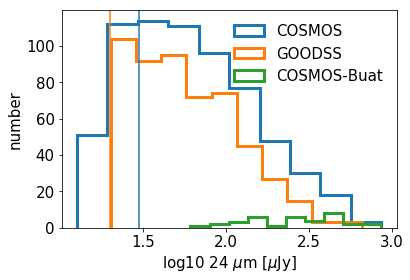

In [532]:
plt.hist(np.log10(COSMOS_sample['spitzer.mips.24']*1e3), histtype = 'step', lw = 3, label = 'COSMOS')
plt.hist(np.log10(GOODSS_sample['spitzer.mips.24']*1e3), histtype = 'step', lw = 3, label = 'GOODSS')
plt.hist(np.log10(Buat18_data['spitzer.mips.24']*1e3), histtype = 'step', lw = 3, label = 'COSMOS-Buat')
plt.axvline(np.log10(30), c = 'C0')
plt.axvline(np.log10(20), c = 'C1')
plt.xlabel(r'log10 24 $\mu$m [$\mu$Jy]', fontsize = 15)
plt.ylabel(r'number', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 3 , loc = 'best')

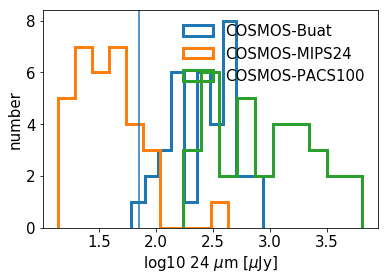

In [533]:
plt.hist(np.log10(Buat18_data['spitzer.mips.24']*1e3), histtype = 'step', lw = 3, label = 'COSMOS-Buat')
plt.hist(np.log10(COSMOS_33['spitzer.mips.24']*1e3), histtype = 'step', lw = 3, label = 'COSMOS-MIPS24')
plt.hist(np.log10(COSMOS_33['herschel.pacs.100']*1e3), histtype = 'step', lw = 3, label = 'COSMOS-PACS100')
plt.axvline(np.log10(71), c = 'C0')
# plt.axvline(np.log10(45), c = 'C1')
plt.xlabel(r'log10 24 $\mu$m [$\mu$Jy]', fontsize = 15)
plt.ylabel(r'number', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 3 , loc = 'best')

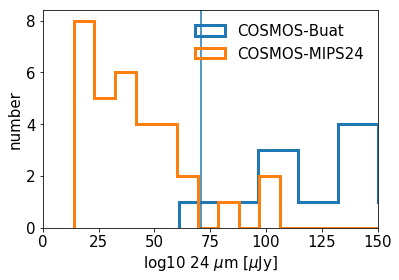

In [534]:
plt.hist(Buat18_data['spitzer.mips.24']*1e3, bins = 45, histtype = 'step', lw = 3, label = 'COSMOS-Buat')
plt.hist(COSMOS_33['spitzer.mips.24']*1e3, bins = 45, histtype = 'step', lw = 3, label = 'COSMOS-MIPS24')
# plt.hist(COSMOS_33['herschel.pacs.100']*1e3, histtype = 'step', lw = 3, label = 'COSMOS-PACS100')
plt.axvline(71, c = 'C0')
plt.xlim(0,150)
# plt.axvline(np.log10(45), c = 'C1')
plt.xlabel(r'log10 24 $\mu$m [$\mu$Jy]', fontsize = 15)
plt.ylabel(r'number', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 3 , loc = 'best')

In [535]:
np.min(Buat18_data['spitzer.mips.24']*1e3)

60.961742

In [536]:
mask_Ha   = (COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']/COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4_err']>3)
mask_OIII = (COSMOS_sample['line.OIII-500.7']/COSMOS_sample['line.OIII-500.7_err']>3)
mask_1                    = (COSMOS_sample['spitzer.mips.24']/COSMOS_sample['spitzer.mips.24_err'] > 3)

COSMOS_sample_Ha = COSMOS_sample[mask_Ha&mask_1&mask_OIII]

In [537]:
len(COSMOS_sample_Ha[(COSMOS_sample_Ha['herschel.pacs.100']/COSMOS_sample_Ha['herschel.pacs.100_err']>3)])

5

In [538]:
mask_Ha   = (COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']/COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4_err']>3)
mask_OIII = (COSMOS_sample['line.OIII-500.7']/COSMOS_sample['line.OIII-500.7_err']>3)

print(len(COSMOS_sample[COSMOS_sample['spitzer.mips.24']*1e3<70]))
print(len(COSMOS_sample[COSMOS_sample['spitzer.mips.24']*1e3<45]))
print(len(COSMOS_sample[(COSMOS_sample['spitzer.mips.24']*1e3>71)&mask_Ha]))
print(len(COSMOS_sample))

395
279
240
660


In [539]:
HELP_large = Table.read('/data/3DHST_Data/COSMOS/'
                        'COSMOS_HELP/HELP_subsample_merged_corrected.fits', format='fits')

In [542]:
irsa_MIPS_COSMOS = Table.read('/data/3DHST_Data/COSMOS/irsa_MIPS/'
                              'irsa_catalog_search_results.tbl', format = 'ascii')

# irsa_MIPS_COSMOS.write('/data/3DHST_Data/COSMOS/irsa_MIPS/'
#                        'irsa_catalog_search_results.fits')

In [ ]:
HELP_irsa = Table.read('/data/3DHST_Data/COSMOS/irsa_MIPS/'
                       'HELP_irsa.fits', format = 'fits')

HELP_irsa_COSMOS_mine = Table.read('/data/3DHST_Data/COSMOS/irsa_MIPS/'
                                   'HELP_irsa_COSMOS_mine.fits', format = 'fits')

In [ ]:
jin_data = Table.read('/data/3DHST_Data/'
                      'COSMOS/Jin_Daddi_COSMOS_VULCAIN/COSMOS_Super_Deblended_FIRmm_Catalog_20180719.fits', format = 'fits')


In [ ]:
help_MIPS_laigle = Table.read('/data/3DHST_Data/COSMOS/COSMOS_Laigle/'
                              'help_MIPS_laigle.fits', format = 'fits')

In [ ]:
laigle_16      = Table.read('/data/3DHST_Data/'
                            'COSMOS/COSMOS_Laigle/COSMOS2015_Laigle+_v1.1.fits', format = 'fits')

In [543]:
irsa_MIPS_COSMOS['total_flux'].unit

Unit("mJy")

In [544]:
HELP_large['help_f_mips_24'].unit

Unit("uJy")

In [585]:
# HELP_large = HELP_large[HELP_large['help_f_mips_24']>0]

/home/jvilla/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


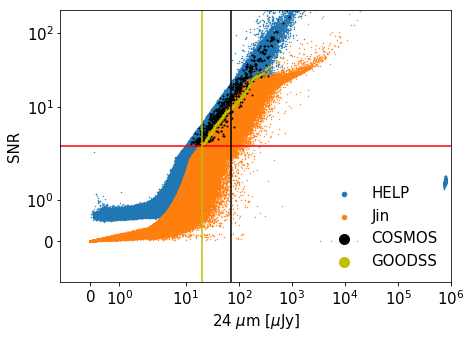

In [545]:
plt.figure(figsize=(7,5))
plt.scatter(HELP_large['help_f_mips_24'],HELP_large['help_f_mips_24']/HELP_large['help_ferr_mips_24'], s = 0.2, label = 'HELP')
# plt.scatter(irsa_MIPS_COSMOS['total_flux']*1e3, irsa_MIPS_COSMOS['total_flux']/irsa_MIPS_COSMOS['flux_err'], s = 0.2, label = 'IRSA')
plt.scatter(jin_data['F24']*1e3, jin_data['F24']/jin_data['DF24'], s = 0.2, label = 'Jin')
plt.scatter(COSMOS_sample['spitzer.mips.24']*1e3, COSMOS_sample['spitzer.mips.24']/COSMOS_sample['spitzer.mips.24_err'], c = 'k', s = 1, label = 'COSMOS')
plt.scatter(GOODSS_sample['spitzer.mips.24']*1e3, GOODSS_sample['spitzer.mips.24']/GOODSS_sample['spitzer.mips.24_err'], c = 'y', s = 1, label = 'GOODSS')
plt.axhline(3, c = 'r')
plt.axvline(71, c = 'k')
plt.axvline(20, c = 'y')
plt.ylim(-1, 200)
plt.xlim(-1, 1e6)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel(r'24 $\mu$m [$\mu$Jy]', fontsize = 15)
plt.ylabel(r'SNR', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 10 , loc = 'lower right')

In [546]:
HELP_Jin        = Table.read('/data/3DHST_Data/Final_samples/test_Jin_HELP_COSMOS_2019/HELPJIN.fits', format = 'fits')
COSMOS_HELP_Jin = Table.read('/data/3DHST_Data/Final_samples/test_Jin_HELP_COSMOS_2019/COSMOS_HELPJIN.fits', format = 'fits')

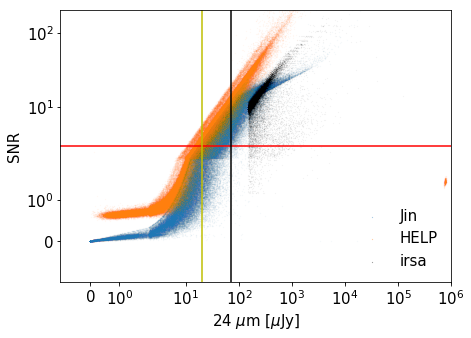

In [547]:
plt.figure(figsize=(7,5))
plt.scatter(HELP_Jin['F24']*1e3, HELP_Jin['F24']/HELP_Jin['DF24'], s = 0.0002, label = 'Jin')
plt.scatter(HELP_Jin['help_f_mips_24'], HELP_Jin['help_f_mips_24']/HELP_Jin['help_ferr_mips_24'], s = 0.0002, label = 'HELP')
# plt.scatter(irsa_MIPS_COSMOS['total_flux']*1e3, irsa_MIPS_COSMOS['total_flux']/irsa_MIPS_COSMOS['flux_err'], s = 0.2, label = 'IRSA')
plt.scatter(HELP_irsa['total_flux']*1e3, HELP_irsa['total_flux']/HELP_irsa['flux_err'], c = 'k', s = 0.0002, label = 'irsa')
# plt.scatter(COSMOS_sample['spitzer.mips.24']*1e3, COSMOS_sample['spitzer.mips.24']/COSMOS_sample['spitzer.mips.24_err'], c = 'k', s = 1, label = 'COSMOS')
# plt.scatter(GOODSS_sample['spitzer.mips.24']*1e3, GOODSS_sample['spitzer.mips.24']/GOODSS_sample['spitzer.mips.24_err'], c = 'y', s = 1, label = 'GOODSS')
plt.axhline(3, c = 'r')
plt.axvline(71, c = 'k')
plt.axvline(20, c = 'y')
plt.ylim(-1, 200)
plt.xlim(-1, 1e6)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel(r'24 $\mu$m [$\mu$Jy]', fontsize = 15)
plt.ylabel(r'SNR', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 10 , loc = 'lower right')

In [548]:
mask_1                    = (COSMOS_HELP_Jin['spitzer.mips.24']/COSMOS_HELP_Jin['spitzer.mips.24_err'] > 3)
COSMOS_HELP_Jin_1         = COSMOS_HELP_Jin[mask_1]

mask_Ha   = (COSMOS_HELP_Jin_1['line.NII-654.8+line.H-alpha+line.NII-658.4']/COSMOS_HELP_Jin_1['line.NII-654.8+line.H-alpha+line.NII-658.4_err']>3)
mask_OIII = (COSMOS_HELP_Jin_1['line.OIII-500.7']/COSMOS_HELP_Jin_1['line.OIII-500.7_err']>3)

COSMOS_HELP_Jin_1             = COSMOS_HELP_Jin_1[( (mask_Ha)^(mask_OIII) )&(mask_Ha)^(mask_OIII)]

mask_Ha   = (COSMOS_HELP_Jin_1['line.NII-654.8+line.H-alpha+line.NII-658.4']/COSMOS_HELP_Jin_1['line.NII-654.8+line.H-alpha+line.NII-658.4_err']>3)
mask_OIII = (COSMOS_HELP_Jin_1['line.OIII-500.7']/COSMOS_HELP_Jin_1['line.OIII-500.7_err']>3)
COSMOS_33 = COSMOS_HELP_Jin_1_1[mask_Ha&mask_OIII]

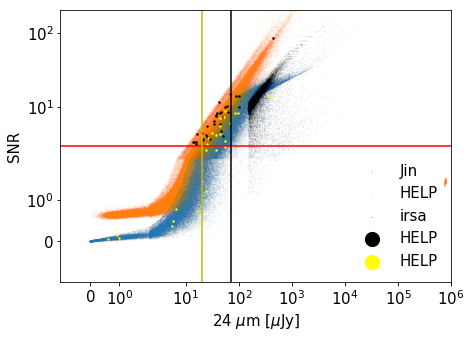

In [549]:
plt.figure(figsize=(7,5))
plt.scatter(HELP_Jin['F24']*1e3, HELP_Jin['F24']/HELP_Jin['DF24'], s = 0.0002, label = 'Jin')
plt.scatter(HELP_Jin['help_f_mips_24'], HELP_Jin['help_f_mips_24']/HELP_Jin['help_ferr_mips_24'], s = 0.0002, label = 'HELP')
# plt.scatter(irsa_MIPS_COSMOS['total_flux']*1e3, irsa_MIPS_COSMOS['total_flux']/irsa_MIPS_COSMOS['flux_err'], s = 0.2, label = 'IRSA')
plt.scatter(HELP_irsa['total_flux']*1e3, HELP_irsa['total_flux']/HELP_irsa['flux_err'], c = 'k', s = 0.0002, label = 'irsa')
plt.scatter(COSMOS_33['help_f_mips_24'], COSMOS_33['help_f_mips_24']/COSMOS_33['help_ferr_mips_24'], c = 'k', s = 2, label = 'HELP')
plt.scatter(COSMOS_33['F24']*1e3, COSMOS_33['F24']/COSMOS_33['DF24'], c = 'yellow', s = 2, label = 'HELP')

# plt.scatter(COSMOS_sample['spitzer.mips.24']*1e3, COSMOS_sample['spitzer.mips.24']/COSMOS_sample['spitzer.mips.24_err'], c = 'k', s = 1, label = 'COSMOS')
# plt.scatter(GOODSS_sample['spitzer.mips.24']*1e3, GOODSS_sample['spitzer.mips.24']/GOODSS_sample['spitzer.mips.24_err'], c = 'y', s = 1, label = 'GOODSS')
plt.axhline(3, c = 'r')
plt.axvline(71, c = 'k')
plt.axvline(20, c = 'y')
plt.ylim(-1, 200)
plt.xlim(-1, 1e6)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel(r'24 $\mu$m [$\mu$Jy]', fontsize = 15)
plt.ylabel(r'SNR', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 10 , loc = 'lower right')

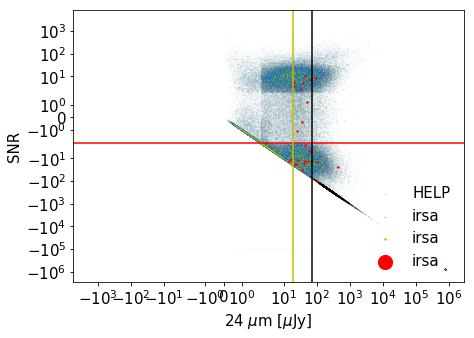

In [550]:
plt.figure(figsize=(7,5))
plt.scatter(HELP_Jin['help_f_mips_24'], HELP_Jin['F24']*1e3-HELP_Jin['help_f_mips_24'], s = 0.0002, label = 'HELP')
plt.scatter(HELP_irsa['help_f_mips_24'], HELP_irsa['total_flux']-HELP_irsa['help_f_mips_24'], c = 'k', s = 0.0002, label = 'irsa')
plt.scatter(COSMOS_HELP_Jin['help_f_mips_24'], COSMOS_HELP_Jin['F24']*1e3-COSMOS_HELP_Jin['help_f_mips_24'], c = 'y', s = 0.02, label = 'irsa')
plt.scatter(COSMOS_33['help_f_mips_24'], COSMOS_33['F24']*1e3-COSMOS_33['help_f_mips_24'], c = 'r', s = 2, label = 'irsa')
plt.axhline(-2, c = 'r')
plt.axvline(71, c = 'k')
plt.axvline(20, c = 'y')
# plt.ylim(-1, 200)
# plt.xlim(-1, 1e6)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel(r'24 $\mu$m [$\mu$Jy]', fontsize = 15)
plt.ylabel(r'SNR', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 10 , loc = 'lower right')

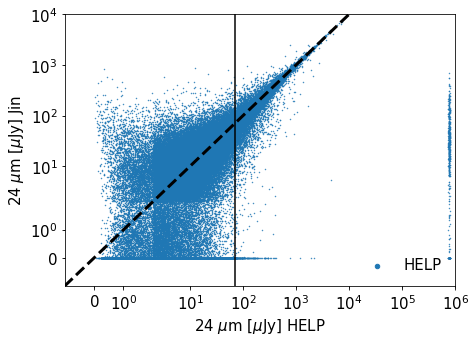

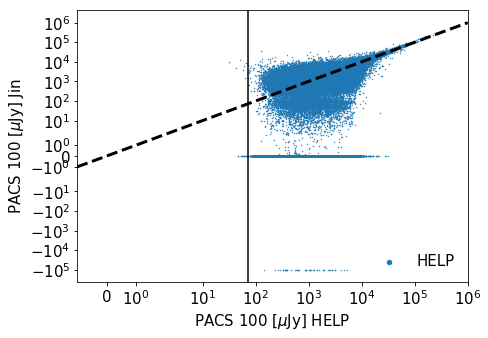

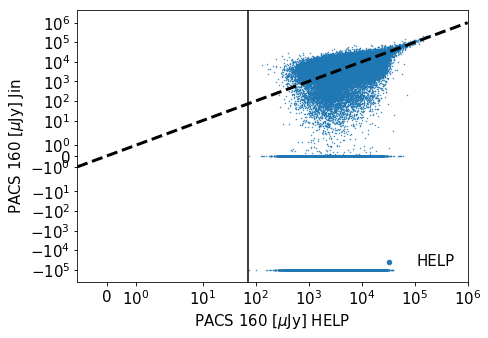

In [551]:
x = np.linspace(-1, 1e6)

plt.figure(figsize=(7,5))
plt.scatter(HELP_Jin['help_f_mips_24'], HELP_Jin['F24']*1e3, s = 0.2, label = 'HELP')
plt.plot(x, x, lw = 3, ls = '--', c = 'k')
# plt.scatter(HELP_Jin['F24']*1e3, HELP_Jin['F24']/HELP_Jin['DF24'], s = 0.2, label = 'HELP')
# plt.axhline(3, c = 'r')
plt.axvline(71, c = 'k')
# plt.axvline(20, c = 'y')
plt.ylim(-1, 1e4)
plt.xlim(-1, 1e6)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel(r'24 $\mu$m [$\mu$Jy] HELP', fontsize = 15)
plt.ylabel(r'24 $\mu$m [$\mu$Jy] Jin', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 10 , loc = 'lower right')

plt.figure(figsize=(7,5))
plt.scatter(HELP_Jin['help_f_pacs_green'], HELP_Jin['F100']*1e3, s = 0.2, label = 'HELP')
plt.plot(x, x, lw = 3, ls = '--', c = 'k')
# plt.scatter(HELP_Jin['F24']*1e3, HELP_Jin['F24']/HELP_Jin['DF24'], s = 0.2, label = 'HELP')
# plt.axhline(3, c = 'r')
plt.axvline(71, c = 'k')
# plt.axvline(20, c = 'y')
# plt.ylim(-1, 1e4)
plt.xlim(-1, 1e6)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel(r'PACS 100 [$\mu$Jy] HELP', fontsize = 15)
plt.ylabel(r'PACS 100 [$\mu$Jy] Jin', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 10 , loc = 'lower right')

plt.figure(figsize=(7,5))
plt.scatter(HELP_Jin['help_f_pacs_red'], HELP_Jin['F160']*1e3, s = 0.2, label = 'HELP')
plt.plot(x, x, lw = 3, ls = '--', c = 'k')
# plt.scatter(HELP_Jin['F24']*1e3, HELP_Jin['F24']/HELP_Jin['DF24'], s = 0.2, label = 'HELP')
# plt.axhline(3, c = 'r')
plt.axvline(71, c = 'k')
# plt.axvline(20, c = 'y')
# plt.ylim(-1, 1e4)
plt.xlim(-1, 1e6)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel(r'PACS 160 [$\mu$Jy] HELP', fontsize = 15)
plt.ylabel(r'PACS 160 [$\mu$Jy] Jin', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 10 , loc = 'lower right')

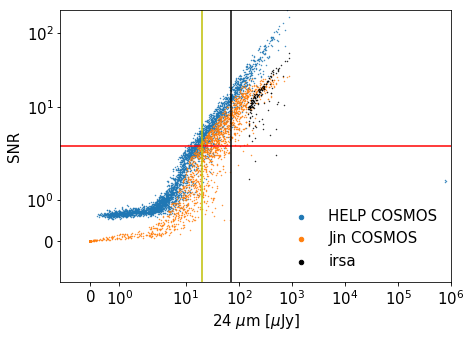

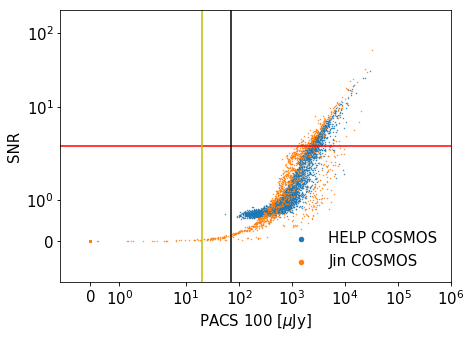

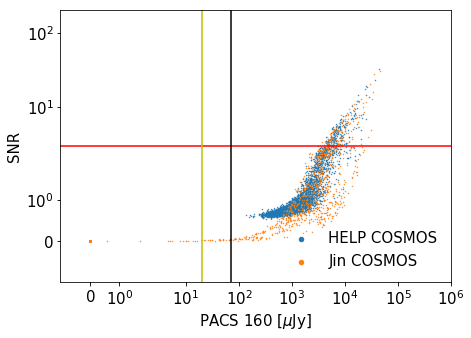

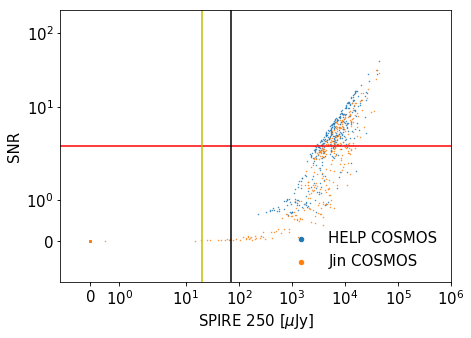

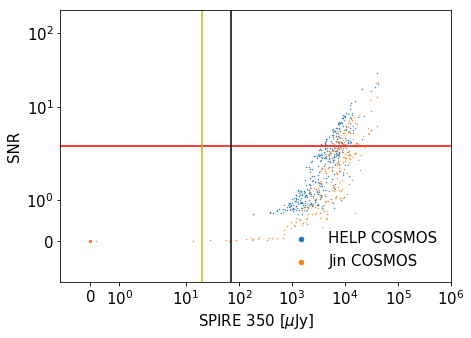

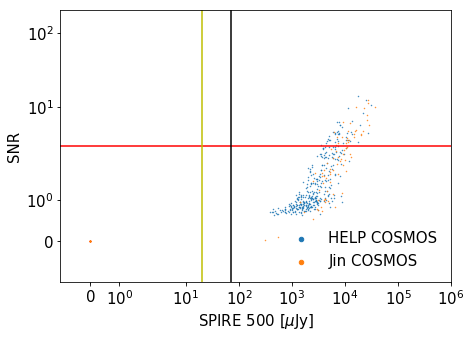

In [552]:
plt.figure(figsize=(7,5))
plt.scatter(COSMOS_HELP_Jin['help_f_mips_24'], COSMOS_HELP_Jin['help_f_mips_24']/COSMOS_HELP_Jin['help_ferr_mips_24'], s = 0.2, label = 'HELP COSMOS')
plt.scatter(COSMOS_HELP_Jin['F24']*1e3, COSMOS_HELP_Jin['F24']/COSMOS_HELP_Jin['DF24'], s = 0.2, label = 'Jin COSMOS')
plt.scatter(HELP_irsa_COSMOS_mine['total_flux']*1e3, HELP_irsa_COSMOS_mine['total_flux']/HELP_irsa_COSMOS_mine['flux_err'], c = 'k', s = 0.2, label = 'irsa')
# plt.scatter(COSMOS_sample['spitzer.mips.24']*1e3, COSMOS_sample['spitzer.mips.24']/COSMOS_sample['spitzer.mips.24_err'], c = 'k', s = 1, label = 'COSMOS')
# plt.scatter(GOODSS_sample['spitzer.mips.24']*1e3, GOODSS_sample['spitzer.mips.24']/GOODSS_sample['spitzer.mips.24_err'], c = 'y', s = 1, label = 'GOODSS')
plt.axhline(3, c = 'r')
plt.axvline(71, c = 'k')
plt.axvline(20, c = 'y')
plt.ylim(-1, 200)
plt.xlim(-1, 1e6)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel(r'24 $\mu$m [$\mu$Jy]', fontsize = 15)
plt.ylabel(r'SNR', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 10 , loc = 'lower right')

plt.figure(figsize=(7,5))
plt.scatter(COSMOS_HELP_Jin['help_f_pacs_green'], COSMOS_HELP_Jin['help_f_pacs_green']/COSMOS_HELP_Jin['help_ferr_pacs_green'], s = 0.2, label = 'HELP COSMOS')
plt.scatter(COSMOS_HELP_Jin['F100']*1e3, COSMOS_HELP_Jin['F100']/COSMOS_HELP_Jin['DF100'], s = 0.2, label = 'Jin COSMOS')
# plt.scatter(COSMOS_sample['spitzer.mips.24']*1e3, COSMOS_sample['spitzer.mips.24']/COSMOS_sample['spitzer.mips.24_err'], c = 'k', s = 1, label = 'COSMOS')
# plt.scatter(GOODSS_sample['spitzer.mips.24']*1e3, GOODSS_sample['spitzer.mips.24']/GOODSS_sample['spitzer.mips.24_err'], c = 'y', s = 1, label = 'GOODSS')
plt.axhline(3, c = 'r')
plt.axvline(71, c = 'k')
plt.axvline(20, c = 'y')
plt.ylim(-1, 200)
plt.xlim(-1, 1e6)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel(r'PACS 100 [$\mu$Jy]', fontsize = 15)
plt.ylabel(r'SNR', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 10 , loc = 'lower right')

plt.figure(figsize=(7,5))
plt.scatter(COSMOS_HELP_Jin['help_f_pacs_red'], COSMOS_HELP_Jin['help_f_pacs_red']/COSMOS_HELP_Jin['help_ferr_pacs_red'], s = 0.2, label = 'HELP COSMOS')
plt.scatter(COSMOS_HELP_Jin['F160']*1e3, COSMOS_HELP_Jin['F160']/COSMOS_HELP_Jin['DF160'], s = 0.2, label = 'Jin COSMOS')
# plt.scatter(COSMOS_sample['spitzer.mips.24']*1e3, COSMOS_sample['spitzer.mips.24']/COSMOS_sample['spitzer.mips.24_err'], c = 'k', s = 1, label = 'COSMOS')
# plt.scatter(GOODSS_sample['spitzer.mips.24']*1e3, GOODSS_sample['spitzer.mips.24']/GOODSS_sample['spitzer.mips.24_err'], c = 'y', s = 1, label = 'GOODSS')
plt.axhline(3, c = 'r')
plt.axvline(71, c = 'k')
plt.axvline(20, c = 'y')
plt.ylim(-1, 200)
plt.xlim(-1, 1e6)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel(r'PACS 160 [$\mu$Jy]', fontsize = 15)
plt.ylabel(r'SNR', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 10 , loc = 'lower right')

plt.figure(figsize=(7,5))
plt.scatter(COSMOS_HELP_Jin['help_f_spire_250'], COSMOS_HELP_Jin['help_f_spire_250']/COSMOS_HELP_Jin['help_ferr_spire_250'], s = 0.2, label = 'HELP COSMOS')
plt.scatter(COSMOS_HELP_Jin['F250']*1e3, COSMOS_HELP_Jin['F250']/COSMOS_HELP_Jin['DF250'], s = 0.2, label = 'Jin COSMOS')
# plt.scatter(COSMOS_sample['spitzer.mips.24']*1e3, COSMOS_sample['spitzer.mips.24']/COSMOS_sample['spitzer.mips.24_err'], c = 'k', s = 1, label = 'COSMOS')
# plt.scatter(GOODSS_sample['spitzer.mips.24']*1e3, GOODSS_sample['spitzer.mips.24']/GOODSS_sample['spitzer.mips.24_err'], c = 'y', s = 1, label = 'GOODSS')
plt.axhline(3, c = 'r')
plt.axvline(71, c = 'k')
plt.axvline(20, c = 'y')
plt.ylim(-1, 200)
plt.xlim(-1, 1e6)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel(r'SPIRE 250 [$\mu$Jy]', fontsize = 15)
plt.ylabel(r'SNR', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 10 , loc = 'lower right')

plt.figure(figsize=(7,5))
plt.scatter(COSMOS_HELP_Jin['help_f_spire_350'], COSMOS_HELP_Jin['help_f_spire_350']/COSMOS_HELP_Jin['help_ferr_spire_350'], s = 0.2, label = 'HELP COSMOS')
plt.scatter(COSMOS_HELP_Jin['F350']*1e3, COSMOS_HELP_Jin['F350']/COSMOS_HELP_Jin['DF350'], s = 0.2, label = 'Jin COSMOS')
# plt.scatter(COSMOS_sample['spitzer.mips.24']*1e3, COSMOS_sample['spitzer.mips.24']/COSMOS_sample['spitzer.mips.24_err'], c = 'k', s = 1, label = 'COSMOS')
# plt.scatter(GOODSS_sample['spitzer.mips.24']*1e3, GOODSS_sample['spitzer.mips.24']/GOODSS_sample['spitzer.mips.24_err'], c = 'y', s = 1, label = 'GOODSS')
plt.axhline(3, c = 'r')
plt.axvline(71, c = 'k')
plt.axvline(20, c = 'y')
plt.ylim(-1, 200)
plt.xlim(-1, 1e6)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel(r'SPIRE 350 [$\mu$Jy]', fontsize = 15)
plt.ylabel(r'SNR', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 10 , loc = 'lower right')

plt.figure(figsize=(7,5))
plt.scatter(COSMOS_HELP_Jin['help_f_spire_500'], COSMOS_HELP_Jin['help_f_spire_500']/COSMOS_HELP_Jin['help_ferr_spire_500'], s = 0.2, label = 'HELP COSMOS')
plt.scatter(COSMOS_HELP_Jin['F500']*1e3, COSMOS_HELP_Jin['F500']/COSMOS_HELP_Jin['DF500'], s = 0.2, label = 'Jin COSMOS')
# plt.scatter(COSMOS_sample['spitzer.mips.24']*1e3, COSMOS_sample['spitzer.mips.24']/COSMOS_sample['spitzer.mips.24_err'], c = 'k', s = 1, label = 'COSMOS')
# plt.scatter(GOODSS_sample['spitzer.mips.24']*1e3, GOODSS_sample['spitzer.mips.24']/GOODSS_sample['spitzer.mips.24_err'], c = 'y', s = 1, label = 'GOODSS')
plt.axhline(3, c = 'r')
plt.axvline(71, c = 'k')
plt.axvline(20, c = 'y')
plt.ylim(-1, 200)
plt.xlim(-1, 1e6)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel(r'SPIRE 500 [$\mu$Jy]', fontsize = 15)
plt.ylabel(r'SNR', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 10 , loc = 'lower right')

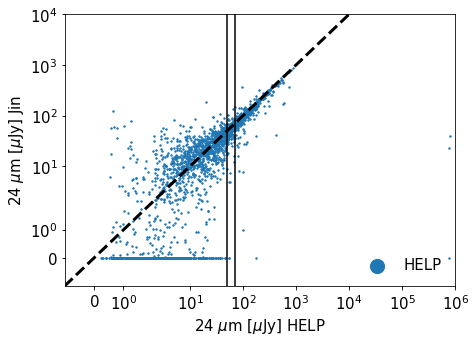

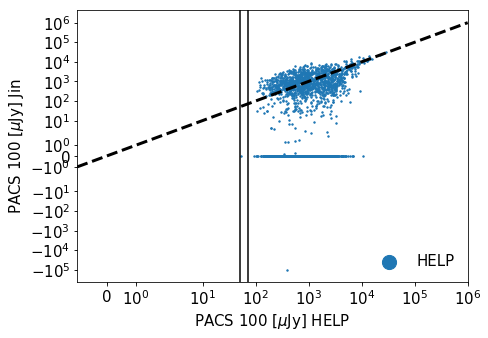

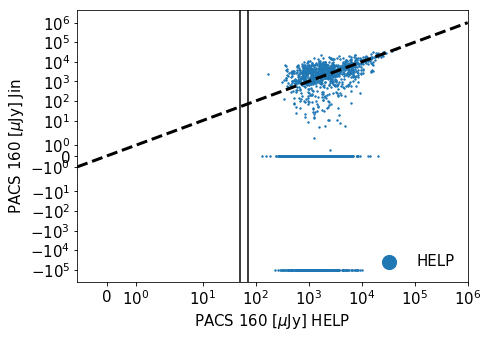

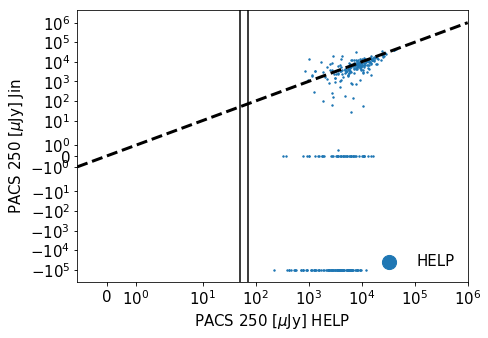

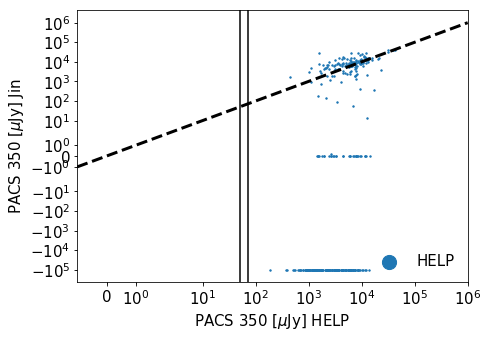

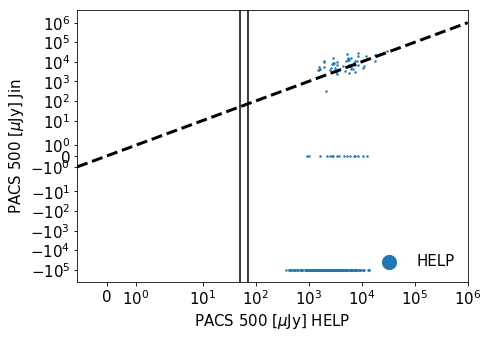

In [553]:
plt.figure(figsize=(7,5))
plt.scatter(COSMOS_HELP_Jin['help_f_mips_24'], COSMOS_HELP_Jin['F24']*1e3, s = 2, label = 'HELP')
plt.plot(x, x, lw = 3, ls = '--', c = 'k')
# plt.scatter(HELP_Jin['F24']*1e3, HELP_Jin['F24']/HELP_Jin['DF24'], s = 0.2, label = 'HELP')
# plt.axhline(3, c = 'r')
plt.axvline(71, c = 'k')
plt.axvline(50, c = 'k')
# plt.axvline(20, c = 'y')
plt.ylim(-1, 1e4)
plt.xlim(-1, 1e6)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel(r'24 $\mu$m [$\mu$Jy] HELP', fontsize = 15)
plt.ylabel(r'24 $\mu$m [$\mu$Jy] Jin', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 10 , loc = 'lower right')

plt.figure(figsize=(7,5))
plt.scatter(COSMOS_HELP_Jin['help_f_pacs_green'], COSMOS_HELP_Jin['F100']*1e3, s = 2, label = 'HELP')
plt.plot(x, x, lw = 3, ls = '--', c = 'k')
# plt.scatter(HELP_Jin['F24']*1e3, HELP_Jin['F24']/HELP_Jin['DF24'], s = 0.2, label = 'HELP')
# plt.axhline(3, c = 'r')
plt.axvline(71, c = 'k')
plt.axvline(50, c = 'k')
# plt.axvline(20, c = 'y')
# plt.ylim(-1, 1e4)
plt.xlim(-1, 1e6)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel(r'PACS 100 [$\mu$Jy] HELP', fontsize = 15)
plt.ylabel(r'PACS 100 [$\mu$Jy] Jin', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 10 , loc = 'lower right')

plt.figure(figsize=(7,5))
plt.scatter(COSMOS_HELP_Jin['help_f_pacs_red'], COSMOS_HELP_Jin['F160']*1e3, s = 2, label = 'HELP')
plt.plot(x, x, lw = 3, ls = '--', c = 'k')
# plt.scatter(HELP_Jin['F24']*1e3, HELP_Jin['F24']/HELP_Jin['DF24'], s = 0.2, label = 'HELP')
# plt.axhline(3, c = 'r')
plt.axvline(71, c = 'k')
plt.axvline(50, c = 'k')
# plt.axvline(20, c = 'y')
# plt.ylim(-1, 1e4)
plt.xlim(-1, 1e6)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel(r'PACS 160 [$\mu$Jy] HELP', fontsize = 15)
plt.ylabel(r'PACS 160 [$\mu$Jy] Jin', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 10 , loc = 'lower right')

plt.figure(figsize=(7,5))
plt.scatter(COSMOS_HELP_Jin['help_f_spire_250'], COSMOS_HELP_Jin['F250']*1e3, s = 2, label = 'HELP')
plt.plot(x, x, lw = 3, ls = '--', c = 'k')
# plt.scatter(HELP_Jin['F24']*1e3, HELP_Jin['F24']/HELP_Jin['DF24'], s = 0.2, label = 'HELP')
# plt.axhline(3, c = 'r')
plt.axvline(71, c = 'k')
plt.axvline(50, c = 'k')
# plt.axvline(20, c = 'y')
# plt.ylim(-1, 1e4)
plt.xlim(-1, 1e6)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel(r'PACS 250 [$\mu$Jy] HELP', fontsize = 15)
plt.ylabel(r'PACS 250 [$\mu$Jy] Jin', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 10 , loc = 'lower right')

plt.figure(figsize=(7,5))
plt.scatter(COSMOS_HELP_Jin['help_f_spire_350'], COSMOS_HELP_Jin['F350']*1e3, s = 2, label = 'HELP')
plt.plot(x, x, lw = 3, ls = '--', c = 'k')
# plt.scatter(HELP_Jin['F24']*1e3, HELP_Jin['F24']/HELP_Jin['DF24'], s = 0.2, label = 'HELP')
# plt.axhline(3, c = 'r')
plt.axvline(71, c = 'k')
plt.axvline(50, c = 'k')
# plt.axvline(20, c = 'y')
# plt.ylim(-1, 1e4)
plt.xlim(-1, 1e6)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel(r'PACS 350 [$\mu$Jy] HELP', fontsize = 15)
plt.ylabel(r'PACS 350 [$\mu$Jy] Jin', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 10 , loc = 'lower right')

plt.figure(figsize=(7,5))
plt.scatter(COSMOS_HELP_Jin['help_f_spire_500'], COSMOS_HELP_Jin['F500']*1e3, s = 2, label = 'HELP')
plt.plot(x, x, lw = 3, ls = '--', c = 'k')
# plt.scatter(HELP_Jin['F24']*1e3, HELP_Jin['F24']/HELP_Jin['DF24'], s = 0.2, label = 'HELP')
# plt.axhline(3, c = 'r')
plt.axvline(71, c = 'k')
plt.axvline(50, c = 'k')
# plt.axvline(20, c = 'y')
# plt.ylim(-1, 1e4)
plt.xlim(-1, 1e6)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel(r'PACS 500 [$\mu$Jy] HELP', fontsize = 15)
plt.ylabel(r'PACS 500 [$\mu$Jy] Jin', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 10 , loc = 'lower right')

In [556]:
# test for IRSA

print(len(HELP_irsa_COSMOS_mine))

COSMOS_sample = HELP_irsa_COSMOS_mine

mask_1                    = (COSMOS_sample['spitzer.mips.24']/COSMOS_sample['spitzer.mips.24_err'] > 3)
COSMOS_sample             = COSMOS_sample[mask_1]

print(len(COSMOS_sample))

mask_Ha   = (COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']/COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4_err']>3)
mask_OIII = (COSMOS_sample['line.OIII-500.7']/COSMOS_sample['line.OIII-500.7_err']>3)

COSMOS_sample             = COSMOS_sample[( (mask_Ha)^(mask_OIII) )&(mask_Ha)^(mask_OIII)]

print(len(COSMOS_sample))

mask_Ha   = (COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4']/COSMOS_sample['line.NII-654.8+line.H-alpha+line.NII-658.4_err']>3)
mask_OIII = (COSMOS_sample['line.OIII-500.7']/COSMOS_sample['line.OIII-500.7_err']>3)

print(len(COSMOS_sample[mask_Ha&mask_OIII]))
print(len(COSMOS_sample[mask_Ha]))
print(len(COSMOS_sample[mask_OIII]))

165
160
111
1
102
10
